In [42]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp

In [43]:
data_set=pd.read_csv('/home/lab4/Downloads/dataset.csv')

In [44]:
x=data_set.iloc[:,:-1].values

In [45]:
print(data_set)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [46]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [47]:
data_set['Age'].fillna(value=data_set['Age'].mean(),inplace=True)

In [48]:
print(data_set)

   Country        Age   Salary Purchased
0   France  44.000000  72000.0        No
1    Spain  27.000000  48000.0       Yes
2  Germany  30.000000  54000.0        No
3    Spain  38.000000  61000.0        No
4  Germany  40.000000      NaN       Yes
5   France  35.000000  58000.0       Yes
6    Spain  38.777778  52000.0        No
7   France  48.000000  79000.0       Yes
8  Germany  50.000000  83000.0        No
9   France  37.000000  67000.0       Yes


In [49]:
data_set=data_set.dropna()

In [51]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 nan]
 [0 35.0 58000.0]
 [2 nan 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


In [52]:
x = data_set.iloc[:, 1:3].values
print ("\nOriginal data values : \n",  x)


Original data values : 
 [[4.40000000e+01 7.20000000e+04]
 [2.70000000e+01 4.80000000e+04]
 [3.00000000e+01 5.40000000e+04]
 [3.80000000e+01 6.10000000e+04]
 [3.50000000e+01 5.80000000e+04]
 [3.87777778e+01 5.20000000e+04]
 [4.80000000e+01 7.90000000e+04]
 [5.00000000e+01 8.30000000e+04]
 [3.70000000e+01 6.70000000e+04]]


In [55]:
from sklearn import preprocessing  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.34782609 0.28571429]
 [0.51207729 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]]


In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/home/lab4/Downloads/train.csv")
X = data.iloc[:,0:20]  
y = data.iloc[:,-1]   

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))  

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


[0.03321793 0.0081051  0.         0.         0.         0.00572313
 0.00366127 0.         0.         0.         0.00750542 0.02540625
 0.02506243 0.84870811 0.00524832 0.02046352 0.         0.
 0.         0.        ]


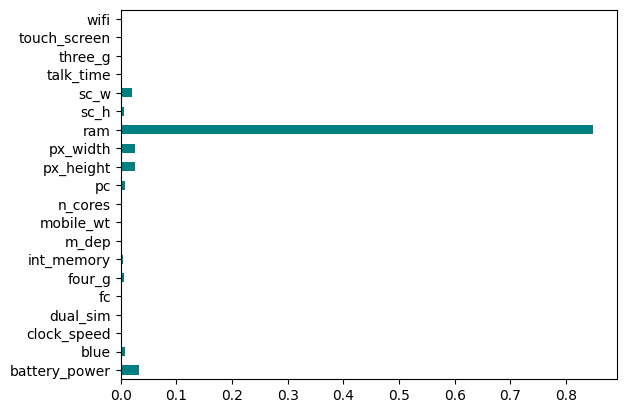

In [60]:
import pandas as pd
import numpy as np

data = pd.read_csv("/home/lab4/Downloads/train.csv")
X = data.iloc[:,0:20]  
Y = data.iloc[:,-1]    

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances=mutual_info_classif(X,Y)
print(importances)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

<AxesSubplot: >

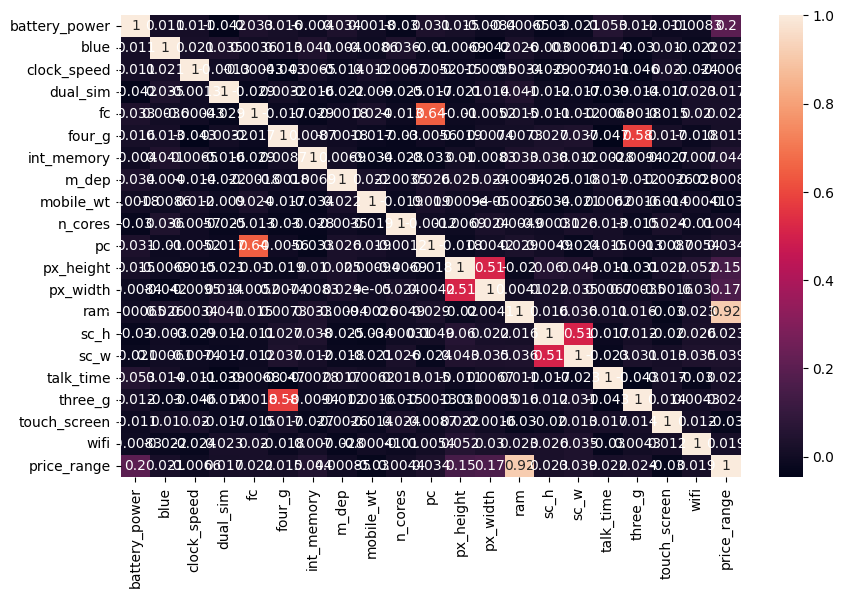

In [62]:
import seaborn as sns
cor=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)